In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [2]:
lfw=datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)#have only those people
#face whose count of face images is >=100and also resizing images


In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw.data.shape

(1140, 1850)

In [5]:
lfw.images.shape

(1140, 50, 37)

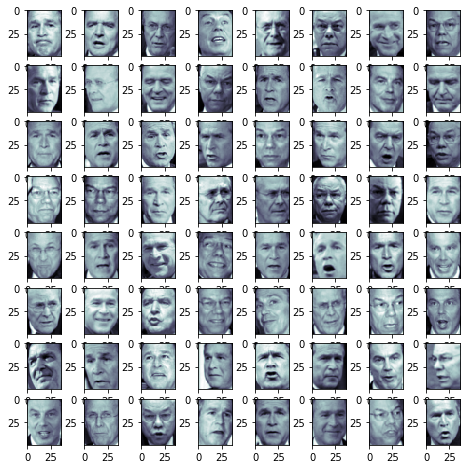

In [6]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
plt.show()

In [7]:
x,y=lfw.data,lfw.target
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pca=PCA()
pca.fit_transform(x_train)

array([[-1.4514586e+03, -3.2081360e+01, -3.9359897e+02, ...,
         3.5857621e-01, -6.3261902e-01,  1.7682445e-03],
       [-3.1962878e+02, -3.1955301e+02,  6.1114014e+01, ...,
         1.8045992e-01,  1.2349169e+00,  1.7683400e-03],
       [-1.2069264e+03, -7.9344208e+02, -3.3489536e+02, ...,
         4.9775481e-01,  2.4121644e-02,  1.7677759e-03],
       ...,
       [ 4.9566385e+02, -6.8017993e+02, -4.0407745e+02, ...,
        -1.0700152e+00, -9.7195782e-02,  1.7683742e-03],
       [-3.6750552e+02,  1.2416622e+03, -4.3799973e+01, ...,
        -1.1658994e+00,  1.6656330e+00,  1.7687249e-03],
       [ 1.9767567e+02,  6.0645556e+00, -2.1186485e+02, ...,
        -1.9764894e+00,  5.7706361e+00,  1.7680741e-03]], dtype=float32)

In [8]:
k=0
total=0
while(total<0.99):
    total+=pca.explained_variance_ratio_[k]
    k=k+1
k

316

In [9]:
pca_lfw=PCA(n_components=k,whiten=True)#whiten is like feature scaling ;by default false
transformed_data=pca_lfw.fit_transform(x_train)
transformed_data.shape

(855, 316)

In [10]:
pca_lfw.components_.shape

(316, 1850)

In [11]:
x_approx=pca_lfw.inverse_transform(transformed_data)
x_approx.shape

(855, 1850)

In [12]:
x_approx_img=x_approx.reshape((855,50,37))

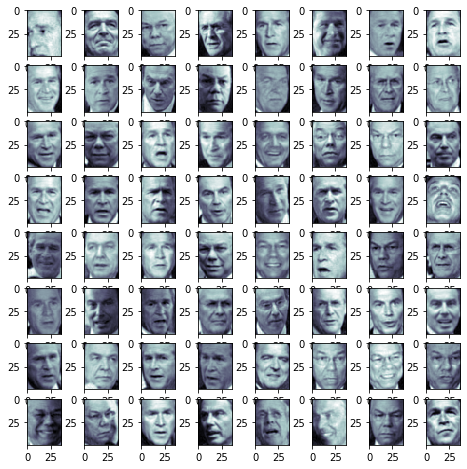

In [13]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_img[i],cmap=plt.cm.bone)#can change colormap
plt.show()

In [14]:
eigenv=pca_lfw.components_
eigenv.shape

(316, 1850)

In [15]:
eigenfaces=eigenv.reshape((k,50,37))

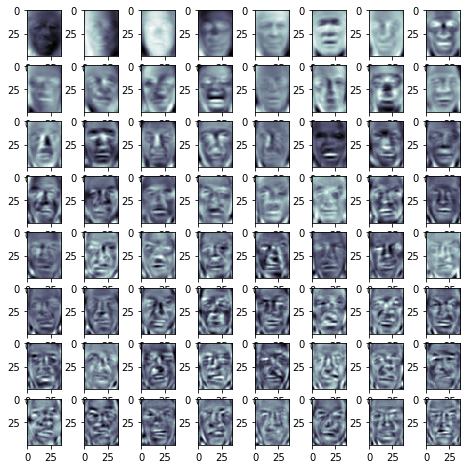

In [16]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)#can change colormap
plt.show()

In [17]:
x_train_pca=transformed_data
x_test_pca=pca_lfw.transform(x_test)

In [18]:
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(rf.score(x_test,y_test))

4.995064735412598
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        61
           1       0.80      0.22      0.35        36
           2       0.57      0.98      0.72       122
           3       1.00      0.13      0.23        31
           4       0.80      0.23      0.36        35

    accuracy                           0.64       285
   macro avg       0.79      0.45      0.48       285
weighted avg       0.72      0.64      0.58       285

[[ 43   1  17   0   0]
 [  7   8  21   0   0]
 [  3   0 119   0   0]
 [  1   1  23   4   2]
 [  0   0  27   0   8]]
0.6385964912280702


In [20]:
rf=ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(rf.score(x_test_pca,y_test))

2.765031099319458
              precision    recall  f1-score   support

           0       0.62      0.16      0.26        61
           1       0.00      0.00      0.00        36
           2       0.45      0.99      0.62       122
           3       0.00      0.00      0.00        31
           4       0.50      0.03      0.05        35

    accuracy                           0.46       285
   macro avg       0.32      0.24      0.19       285
weighted avg       0.39      0.46      0.33       285

[[ 10   0  50   0   1]
 [  2   0  34   0   0]
 [  1   0 121   0   0]
 [  1   0  30   0   0]
 [  2   0  32   0   1]]
0.4631578947368421


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [24]:
clf1=SVC()

grid={'C':[1e2,1e3,5e2,5e3,5e4],
     'gamma':[1e-3,5e-4,1e-4,5e-3]}
xyz=GridSearchCV(clf1,grid)
start=time.time()
xyz.fit(x_train,y_train)
print(time.time()-start)
y_pred=xyz.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(xyz.score(x_test,y_test))

552.0758304595947


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.00      0.00      0.00        36
           2       0.43      1.00      0.60       122
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        35

    accuracy                           0.43       285
   macro avg       0.09      0.20      0.12       285
weighted avg       0.18      0.43      0.26       285

[[  0   0  61   0   0]
 [  0   0  36   0   0]
 [  0   0 122   0   0]
 [  0   0  31   0   0]
 [  0   0  35   0   0]]
0.4280701754385965


In [25]:
clf1=SVC()

grid={'C':[1e2,1e3,5e2,5e3,5e4],
     'gamma':[1e-3,5e-4,1e-4,5e-3]}
xyz=GridSearchCV(clf1,grid)
start=time.time()
xyz.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=xyz.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(xyz.score(x_test_pca,y_test))

60.06815958023071
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        61
           1       0.86      0.69      0.77        36
           2       0.85      0.95      0.90       122
           3       1.00      0.68      0.81        31
           4       0.94      0.83      0.88        35

    accuracy                           0.87       285
   macro avg       0.89      0.81      0.84       285
weighted avg       0.87      0.87      0.86       285

[[ 56   2   1   0   2]
 [  3  25   8   0   0]
 [  5   1 116   0   0]
 [  3   1   6  21   0]
 [  1   0   5   0  29]]
0.8666666666666667


In [26]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
start=time.time()
clf.fit(x_train,y_train)
print(time.time()-start)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

print(clf.score(x_test,y_test))

4.340956926345825
              precision    recall  f1-score   support

           0       0.81      0.89      0.84        61
           1       0.84      0.72      0.78        36
           2       0.86      0.93      0.89       122
           3       0.93      0.81      0.86        31
           4       0.93      0.77      0.84        35

    accuracy                           0.86       285
   macro avg       0.87      0.82      0.84       285
weighted avg       0.86      0.86      0.86       285

[[ 54   1   4   0   2]
 [  4  26   6   0   0]
 [  5   3 113   1   0]
 [  3   1   2  25   0]
 [  1   0   6   1  27]]
0.8596491228070176


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
clf=LogisticRegression()
start=time.time()
clf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=clf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(clf.score(x_test_pca,y_test))

0.29999685287475586
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        61
           1       0.90      0.75      0.82        36
           2       0.85      0.96      0.90       122
           3       0.88      0.71      0.79        31
           4       0.90      0.80      0.85        35

    accuracy                           0.86       285
   macro avg       0.88      0.81      0.84       285
weighted avg       0.87      0.86      0.86       285

[[ 52   1   5   1   2]
 [  3  27   5   0   1]
 [  2   1 117   2   0]
 [  4   1   4  22   0]
 [  1   0   6   0  28]]
0.8631578947368421
